<h1><center>Analysis of Multiple Dimension Reduction Techniques for Population Structure</center></h1>
<b><center>Jeff Jaureguy, Dominic Schenone, Daniella Vo</center></b>
<b><center>CSE 284 Final Project</center></b>
<b><center>4 June 2021</center></b>

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

## Generate Data

### PCA Data Generation

In [ ]:
data = pd.read_csv('/datasets/cs284-sp21-A00-public/ps2/precomputed/ps2_pca.genotypes.tab', sep='\t', 
                   names=samples, index_col=False)

pca = PCA().fit(data.T)
exp_var = pca.explained_variance_ratio_
pc_samples = pd.DataFrame(pca.transform(data.T),
                          index = data.columns)
cum_var = exp_var.cumsum()
pc_samples.to_csv('pca_res.tsv', sep='\t')

fout = open('pca_cum_variance.txt', 'w')
print(*cum_var, sep='\n', file=fout)
fout.close()

### t-SNE Data Generation

In [ ]:
# All components

for p in [10, 20, 30, 40, 50]:
    tsne = TSNE(perplexity=p).fit_transform(pca_res)
    tsne_samples = pd.DataFrame(tsne,
                          index = data.columns)
    tsne_file = 'tsne/tsne_ac_' + str(p) + '.tsv'
    tsne_samples.to_csv(tsne_file, sep='\t')
    

# Components for 95% variance
num_comp = index_95+1
variance = '95'

for p in [10, 20, 30, 40, 50]:
    tsne = TSNE(perplexity=p).fit_transform(pca_res.iloc[:,:num_comp])
    tsne_samples = pd.DataFrame(tsne,
                          index = data.columns)
    tsne_file = 'tsne/tsne_' + variance + '_' + str(p) + '.tsv'
    tsne_samples.to_csv(tsne_file, sep='\t')
    

# Components for 80% variance
num_comp = index_80+1
variance = '80'

for p in [10, 20, 30, 40, 50]:
    tsne = TSNE(perplexity=p).fit_transform(pca_res.iloc[:,:num_comp])
    tsne_samples = pd.DataFrame(tsne,
                          index = data.columns)
    tsne_file = 'tsne/tsne_' + variance + '_' + str(p) + '.tsv'
    tsne_samples.to_csv(tsne_file, sep='\t')
    

### UMAP Data Generation

In [ ]:
samples_file = "/datasets/cs284-sp21-A00-public/ps2/precomputed/ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
data = pd.read_csv('/datasets/cs284-sp21-A00-public/ps2/precomputed/ps2_pca.genotypes.tab', sep='\t', 
                   names=samples, index_col=False)

umapModel_2 = umap.UMAP(n_components = 2, min_dist = 0.01, n_neighbors = 2, n_epochs = 250, verbose = 2)
umapModel_3 = umap.UMAP(n_components = 2, min_dist = 0.01, n_neighbors = 3, n_epochs = 250, verbose = 2)
umapModel_5 = umap.UMAP(n_components = 2, min_dist = 0.01, n_neighbors = 5, n_epochs = 250, verbose = 2)
umapModel_20 = umap.UMAP(n_components = 2, min_dist = 0.01, n_neighbors = 20, n_epochs = 250, verbose = 2)
index_80 = sum(i < 0.8 for i in cumvar)
index_95 = sum(i < 0.95 for i in cumvar)

num_comp_80 = index_80+1
num_comp_95 = index_95+1
umap2 = umapModel_2.fit_transform(pca_res)
umap3 = umapModel_3.fit_transform(pca_res)
umap5 = umapModel_5.fit_transform(pca_res)
umap20 = umapModel_20.fit_transform(pca_res)

umap_80_2 = umapModel_2.fit_transform(pca_res.iloc[:,:num_comp_80])
umap_80_3 = umapModel_3.fit_transform(pca_res.iloc[:,:num_comp_80])
umap_80_5 = umapModel_5.fit_transform(pca_res.iloc[:,:num_comp_80])
umap_80_20 = umapModel_20.fit_transform(pca_res.iloc[:,:num_comp_80])

umap_95_2 = umapModel_2.fit_transform(pca_res.iloc[:,:num_comp_95])
umap_95_3 = umapModel_3.fit_transform(pca_res.iloc[:,:num_comp_95])
umap_95_5 = umapModel_5.fit_transform(pca_res.iloc[:,:num_comp_95])
umap_95_20 = umapModel_20.fit_transform(pca_res.iloc[:,:num_comp_95])

umap_samples_2 = pd.DataFrame(umap2,
                index = data.columns)                              
umap_samples_80_2 = pd.DataFrame(umap_80_2,
                        index = data.columns)
umap_samples_95_2 = pd.DataFrame(umap_95_2,
                        index = data.columns)                         
                                  
umap_samples_3 = pd.DataFrame(umap3,
                index = data.columns)                          
umap_samples_80_3 = pd.DataFrame(umap_80_3,
                        index = data.columns)
umap_samples_95_3 = pd.DataFrame(umap_95_3,
                        index = data.columns)                         
                                  
umap_samples_5 = pd.DataFrame(umap5,
                        index = data.columns)
umap_samples_80_5 = pd.DataFrame(umap_80_5,
                        index = data.columns)
umap_samples_95_5 = pd.DataFrame(umap_95_5,
                        index = data.columns)                                   
                                  
umap_samples_20 = pd.DataFrame(umap20,
                        index = data.columns)                                  
umap_samples_80_20 = pd.DataFrame(umap_80_20,
                        index = data.columns)
umap_samples_95_20 = pd.DataFrame(umap_95_20 ,
                        index = data.columns) 

umap_file2 = 'umap/umap_ac_2.tsv'
umap_file3 = 'umap/umap_ac_3.tsv'
umap_file5 = 'umap/umap_ac_5.tsv'
umap_file20 = 'umap/umap_ac_20.tsv'
umap_file_80_2 = 'umap/umap_ac_80_2.tsv'
umap_file_80_3 = 'umap/umap_ac_80_3.tsv'
umap_file_80_5 = 'umap/umap_ac_80_5.tsv'
umap_file_80_20 = 'umap/umap_ac_80_20.tsv'
umap_file_95_2 = 'umap/umap_ac_95_2.tsv'
umap_file_95_3 = 'umap/umap_ac_95_3.tsv'
umap_file_95_5 = 'umap/umap_ac_95_5.tsv'
umap_file_95_20 = 'umap/umap_ac_95_20.tsv'

umap_samples_2.to_csv(umap_file2, sep='\t')
umap_samples_3.to_csv(umap_file3, sep='\t')
umap_samples_5.to_csv(umap_file5, sep='\t')
umap_samples_20.to_csv(umap_file20, sep='\t')
umap_samples_80_2.to_csv(umap_file_80_2, sep='\t')
umap_samples_80_3.to_csv(umap_file_80_3, sep='\t')
umap_samples_80_5.to_csv(umap_file_80_5, sep='\t')
umap_samples_80_20.to_csv(umap_file_80_20, sep='\t')
umap_samples_95_2.to_csv(umap_file_95_2, sep='\t')
umap_samples_95_3.to_csv(umap_file_95_3, sep='\t')
umap_samples_95_5.to_csv(umap_file_95_5, sep='\t')
umap_samples_95_20.to_csv(umap_file_95_20, sep='\t')

## Load in Precomputed Data

In [3]:
####### Helper code: set up sample lists and color information #####
# Load population labels
sample_to_pop = {} # maps sample -> population code. e.g. sample_to_pop["NA12878"] = "CEU"
with open("/datasets/cs284-sp21-A00-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"None": "gray"}
for pop in ["ACB","ASW"]: pop_to_color[pop] = "yellow" # Admixed African
for pop in ["GIH","BEB","ITU", "PJL","STU"]: pop_to_color[pop] = "orange" # South Asian
for pop in ["CDX","CHB","CHS","JPT","KHV"]: pop_to_color[pop] = "green" # East Asian
for pop in ["CEU","FIN","GBR","IBS","TSI"]: pop_to_color[pop] = "blue" # European
for pop in ["CLM","MXL","PEL","PUR"]: pop_to_color[pop] = "purple" # American
for pop in ["LWK","MSL","YRI","ESN","GWD"]: pop_to_color[pop] = "red" # African
    
# Load samples list and get colors
# Assumes you'll be using precomputed results in
# /datasets/cs284-sp21-A00-public/ps2/precomputed/
samples_file = "/datasets/cs284-sp21-A00-public/ps2/precomputed/ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
    
####### Helper code: set up sample lists and color information #####
# Load population labels
sample_to_pop = {} # maps sample -> population code. e.g. sample_to_pop["NA12878"] = "CEU"
with open("/datasets/cs284-sp21-A00-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"None": "gray"}

for pop in ["GIH"]: pop_to_color[pop] = "orange" # South Asian
for pop in ["BEB"]: pop_to_color[pop] = "darkorange" # South Asian
for pop in ["ITU"]: pop_to_color[pop] = "sandybrown" # South Asian
for pop in ["PJL"]: pop_to_color[pop] = 'peachpuff' # American
for pop in ["STU"]: pop_to_color[pop] = "lightsalmon" # American

for pop in ["CDX"]: pop_to_color[pop] = "olivedrab" # East Asian
for pop in ["CHB"]: pop_to_color[pop] = 'green' # East Asian
for pop in ["CHS"]: pop_to_color[pop] = "yellowgreen" # East Asian
for pop in ["JPT"]: pop_to_color[pop] = "limegreen" # East Asian
for pop in ["KHV"]: pop_to_color[pop] = "palegreen" # East Asian
    
for pop in ["CEU"]: pop_to_color[pop] = "deepskyblue" # European
for pop in ["FIN"]: pop_to_color[pop] = "lightskyblue" # European
for pop in ["GBR"]: pop_to_color[pop] = "blue" # European
for pop in ["IBS"]: pop_to_color[pop] = "cornflowerblue" # European
for pop in ["TSI"]: pop_to_color[pop] = "darkturquoise" # European

for pop in ["CLM"]: pop_to_color[pop] = "purple" # American
for pop in ["MXL"]: pop_to_color[pop] = "mediumpurple" # American
for pop in ["PEL"]: pop_to_color[pop] = "darkviolet" # American
for pop in ["PUR"]: pop_to_color[pop] = "indigo" # American

for pop in ["LWK"]: pop_to_color[pop] = "firebrick" # African
for pop in ["MSL"]: pop_to_color[pop] = 'red' # African
for pop in ["YRI"]: pop_to_color[pop] = "lightcoral" # African
for pop in ["ESN"]: pop_to_color[pop] = "crimson" # African
for pop in ["GWD"]: pop_to_color[pop] = "darkred" # African
    
for pop in ["ACB"]: pop_to_color[pop] = "yellow" # Admixed African
for pop in ["ASW"]: pop_to_color[pop] = "gold" # Admixed African
    
# Load samples list and get colors
# Assumes you'll be using precomputed results in
# /datasets/cs284-sp21-A00-public/ps2/precomputed/
samples_file = "/datasets/cs284-sp21-A00-public/ps2/precomputed/ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
colors2 = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    shape = pop_to_color[pop]
    colors2.append(shape)
    
pca_res = pd.read_csv('pca_res.tsv', sep='\t', index_col=0)

cumvar_file = open('pca_cum_variance.txt', 'r')
cumvar = cumvar_file.readlines()
cumvar = [float(x.strip()) for x in cumvar]

expvar_file = open('pca_exp_variance.txt', 'r')
expvar = expvar_file.readlines()
expvar = [float(x.strip()) for x in expvar]

print('Num of PCs to capture variance:')
index_50 = sum(i < 0.5 for i in cumvar)
print('Components to capture 50% of the variance:', index_50+1)
index_60 = sum(i < 0.6 for i in cumvar)
print('Components to capture 60% of the variance:', index_60+1)
index_70 = sum(i < 0.7 for i in cumvar)
print('Components to capture 80% of the variance:', index_70+1)
index_75 = sum(i < 0.75 for i in cumvar)
print('Components to capture 75% of the variance:', index_75+1)
index_80 = sum(i < 0.8 for i in cumvar)
print('Components to capture 80% of the variance:', index_80+1)
index_90 = sum(i < 0.9 for i in cumvar)
print('Components to capture 90% of the variance:', index_90+1)
index_95 = sum(i < 0.95 for i in cumvar)
print('Components to capture 95% of the variance:', index_95+1)
print('Total components:', len(cumvar))

Num of PCs to capture variance:
Components to capture 50% of the variance: 349
Components to capture 60% of the variance: 526
Components to capture 80% of the variance: 758
Components to capture 75% of the variance: 902
Components to capture 80% of the variance: 1073
Components to capture 90% of the variance: 1541
Components to capture 95% of the variance: 1896
Total components: 2504


## Figure 1: PCA, Cum Var Plot

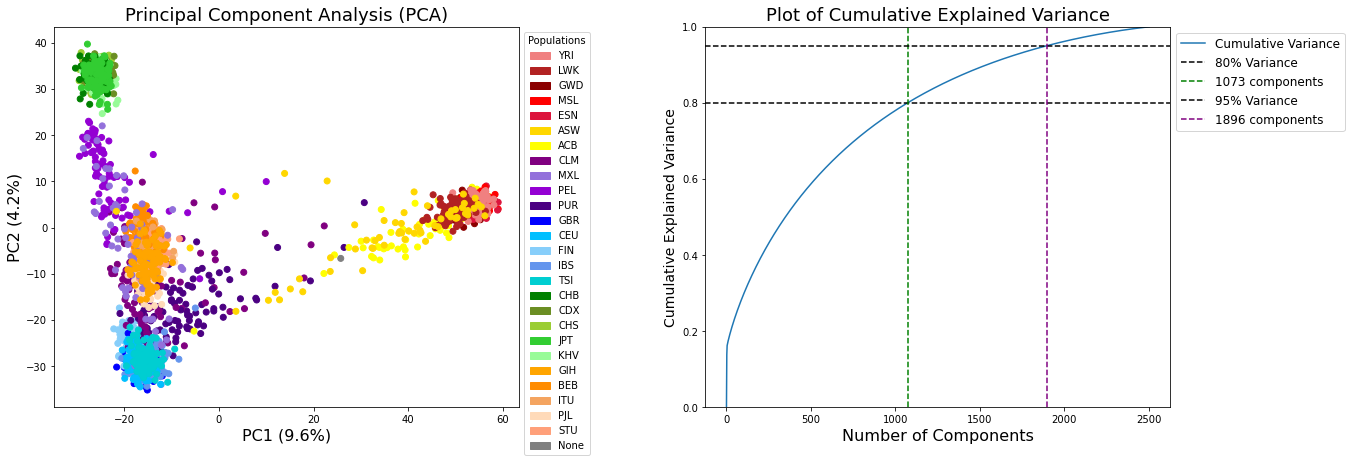

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
plt.subplots_adjust(wspace = 0.4)

# add the labels, use the exp_var
ax[0].set_xlabel('PC1 (%.1f%%)'%(expvar[0]*100), fontsize = 16)
ax[0].set_ylabel('PC2 (%.1f%%)'%(expvar[1]*100), fontsize = 16)
ax[0].set_title('Principal Component Analysis (PCA)', fontsize = 18)

# Legend
red_patch = mpatches.Patch(color='red', label="MSL")
purple_patch = mpatches.Patch(color='purple', label="CLM")
yellow_patch = mpatches.Patch(color='yellow', label='ACB')
green_patch = mpatches.Patch(color='green', label="CHB")
orange_patch = mpatches.Patch(color='orange', label="GIH")
blue_patch = mpatches.Patch(color='blue', label="GBR")
gray_patch = mpatches.Patch(color='gray', label='None')
darkorange_patch = mpatches.Patch(color='darkorange', label="BEB")
sandybrown_patch = mpatches.Patch(color='sandybrown', label="ITU")
peachpuff_patch = mpatches.Patch(color='peachpuff', label="PJL")
lightsalmon_patch = mpatches.Patch(color='lightsalmon', label="STU")
olivedrab_patch =  mpatches.Patch(color='olivedrab', label="CDX")
yellowgreen_patch = mpatches.Patch(color='yellowgreen', label="CHS")
limegreen_patch = mpatches.Patch(color='limegreen', label="JPT")
palegreen_patch = mpatches.Patch(color='palegreen', label="KHV")
deepskyblue_patch = mpatches.Patch(color='deepskyblue', label="CEU")
lightskyblue_patch = mpatches.Patch(color='lightskyblue', label="FIN")
cornflowerblue_patch = mpatches.Patch(color='cornflowerblue', label="IBS")
darkturquoise_patch = mpatches.Patch(color='darkturquoise', label="TSI")
mediumpurple_patch =  mpatches.Patch(color='mediumpurple', label="MXL")
darkviolet_patch = mpatches.Patch(color='darkviolet', label="PEL")
indigo_patch = mpatches.Patch(color='indigo', label="PUR")
firebrick_brick_patch = mpatches.Patch(color='firebrick', label="LWK")
lightcoral_patch = mpatches.Patch(color='lightcoral', label="YRI")
crimson_patch = mpatches.Patch(color='crimson', label="ESN")
darkred_patch = mpatches.Patch(color='darkred', label="GWD")
gold_patch = mpatches.Patch(color='gold', label="ASW")

ax[0].legend(handles=[lightcoral_patch, firebrick_brick_patch, darkred_patch, red_patch, crimson_patch, gold_patch,
                    yellow_patch, purple_patch, mediumpurple_patch, darkviolet_patch, indigo_patch, blue_patch,
                    deepskyblue_patch, lightskyblue_patch, cornflowerblue_patch, darkturquoise_patch, green_patch,
                    olivedrab_patch, yellowgreen_patch, limegreen_patch, palegreen_patch, orange_patch, darkorange_patch,
                    sandybrown_patch, peachpuff_patch, lightsalmon_patch, gray_patch],
           title='Populations', bbox_to_anchor=(1, 1), loc='upper left')
    
    
ax[0].scatter(pca_res.iloc[:,0], pca_res.iloc[:,1], c=colors2)

# add a zero at the start so the plot extends all the way down
cum_var_plot = [0] + list(cumvar)

# plot
ax[1].plot(range(len(cum_var_plot)), cum_var_plot, label = 'Cumulative Variance')

# add some lines to illustrate the question
ax[1].axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax[1].axvline(index_80+1, color = 'g', linestyle = '--', label = '%s components'%(index_80+1))

# add some lines to illustrate the question
ax[1].axhline(0.95, color = 'k', linestyle = '--', label = '95% Variance')
ax[1].axvline(index_95+1, color = 'purple', linestyle = '--', label = '%s components'%(index_95+1))

# limit the y axes
ax[1].set_ylim([0, 1])

# axes labels and legend
ax[1].set_xlabel('Number of Components', fontsize = 16)
ax[1].set_ylabel('Cumulative Explained Variance', fontsize = 14)
ax[1].set_title('Plot of Cumulative Explained Variance', fontsize=18)
_ = ax[1].legend(fontsize = 12, bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

## Figure 2: t-SNE Plots

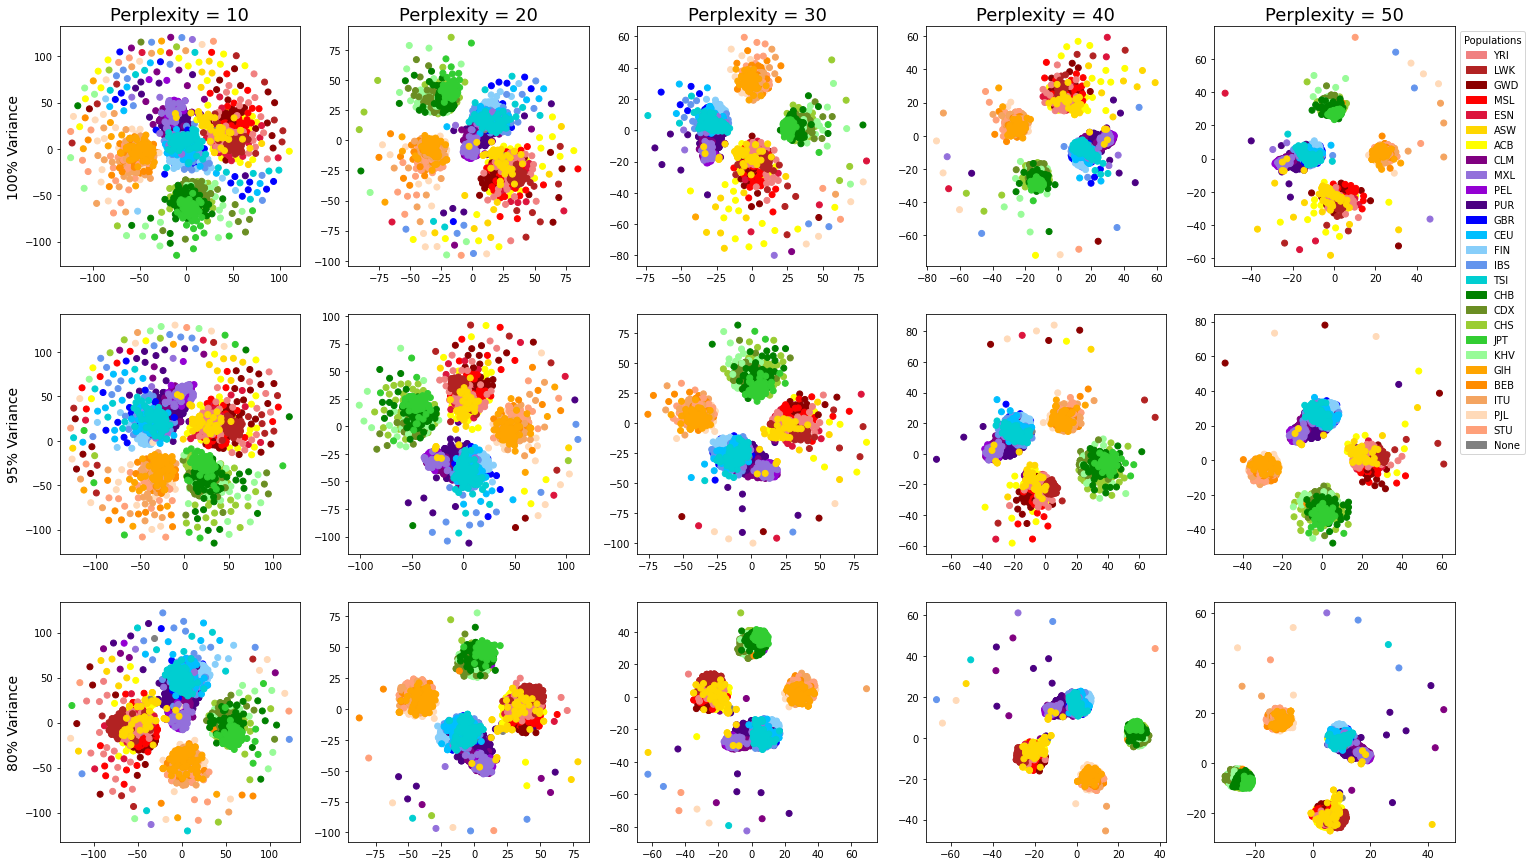

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=5, squeeze=False, figsize=(25,15))

# All components
for i, p in enumerate(['10', '20', '30', '40', '50']):
    tsne_file = 'tsne/tsne_ac_' + p + '.tsv'
    tsne_samples = pd.read_csv(tsne_file, sep='\t', index_col=0)

    axs[0, i].scatter(tsne_samples.iloc[:,0], tsne_samples.iloc[:,1], c=colors2)
    #print(str(p))
    axs[0,i].set_title('Perplexity = %s'%p, fontsize=18)
    axs[0,0].set_ylabel('100% Variance', fontsize=14)
        

# Components for 95% variance
variance = '95'

for i, p in enumerate(['10', '20', '30', '40', '50']):
    tsne_file = 'tsne/tsne_' + variance + '_' + str(p) + '.tsv'
    tsne_samples = pd.read_csv(tsne_file, sep='\t', index_col=0)
   
    axs[1, i].scatter(tsne_samples.iloc[:,0], tsne_samples.iloc[:,1], c=colors2)
    axs[1,0].set_ylabel('95% Variance', fontsize=14)
    
# Components for 80% variance
variance = '80'

for i, p in enumerate(['10', '20', '30', '40', '50']):
    tsne_file = 'tsne/tsne_' + variance + '_' + str(p) + '.tsv'
    tsne_samples = pd.read_csv(tsne_file, sep='\t', index_col=0)
   
    axs[2, i].scatter(tsne_samples.iloc[:,0], tsne_samples.iloc[:,1], c=colors2)
    axs[2,0].set_ylabel('80% Variance', fontsize=14)


axs[0,4].legend(handles=[lightcoral_patch, firebrick_brick_patch, darkred_patch, red_patch, crimson_patch, gold_patch,
                    yellow_patch, purple_patch, mediumpurple_patch, darkviolet_patch, indigo_patch, blue_patch,
                    deepskyblue_patch, lightskyblue_patch, cornflowerblue_patch, darkturquoise_patch, green_patch,
                    olivedrab_patch, yellowgreen_patch, limegreen_patch, palegreen_patch, orange_patch, darkorange_patch,
                    sandybrown_patch, peachpuff_patch, lightsalmon_patch, gray_patch],
                    title='Populations', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

## Figure 3: UMAP Plots

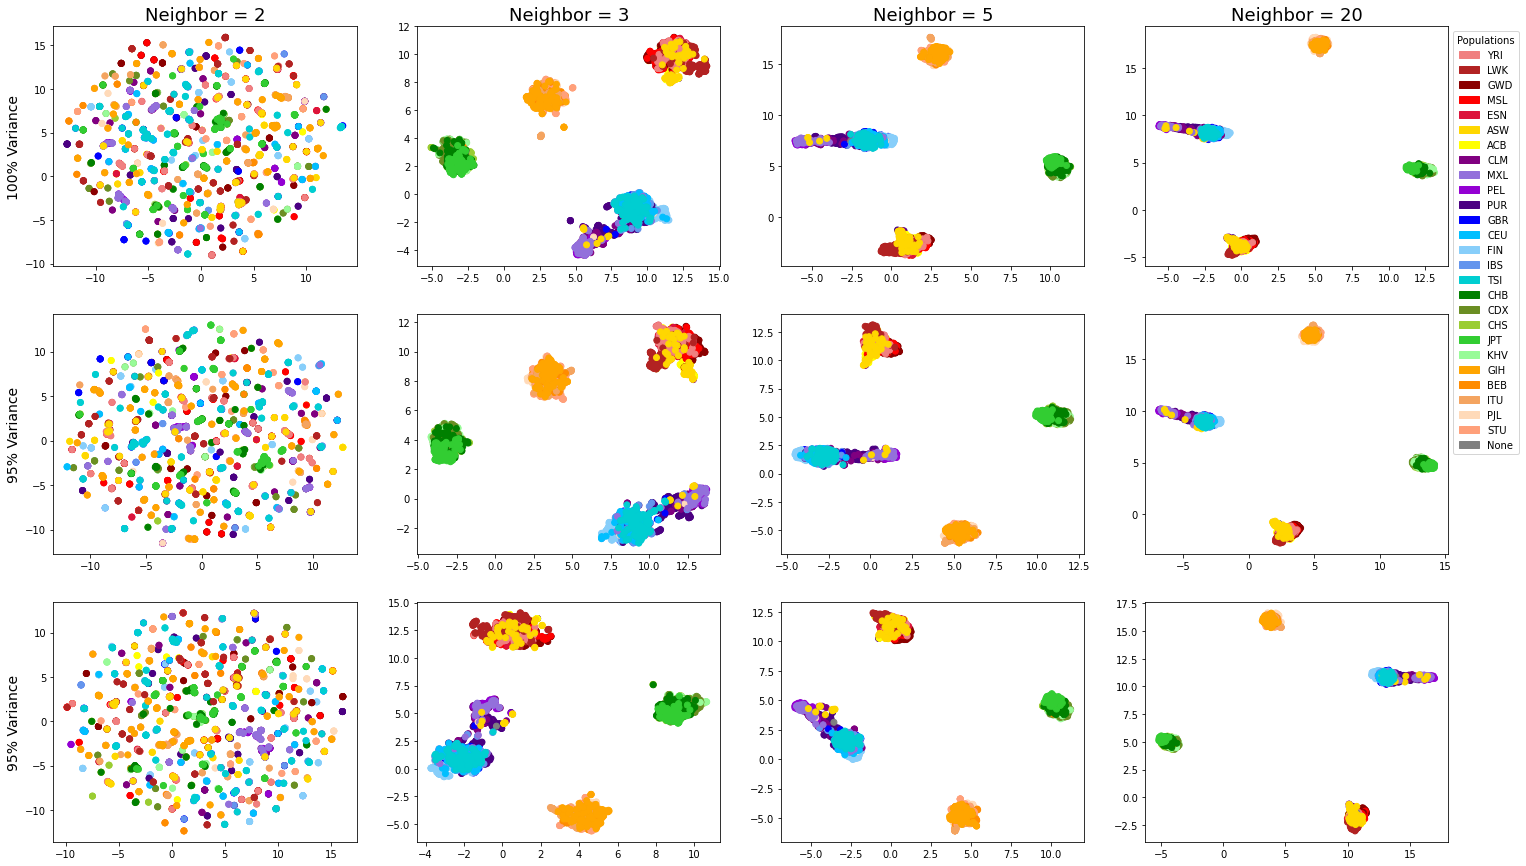

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=4, squeeze=False, figsize=(25,15))


for i, p in enumerate(['2', '3', '5', '20']):
    umap_file = 'umap/umap_ac_' +  str(p) + '.tsv'
    umap_samples = pd.read_csv(umap_file, sep='\t', index_col=0)
    axs[0, i].scatter(umap_samples.iloc[:,0], umap_samples.iloc[:,1], c=colors2)
    #print(str(p))
    axs[0,i].set_title('Neighbor = %s'%p, fontsize=18)
    axs[0,0].set_ylabel('100% Variance', fontsize=14)

variance = '95'
    
for i, p in enumerate(['2', '3', '5', '20']):
    umap_file = 'umap/umap_ac_' + '95_' + str(p) + '.tsv'
    umap_samples = pd.read_csv(umap_file, sep='\t', index_col=0)
    axs[1, i].scatter(umap_samples.iloc[:,0], umap_samples.iloc[:,1], c=colors2)
    #print(str(p))
    axs[1,0].set_ylabel('95% Variance', fontsize=14)
    
variance = '80'
    
for i, p in enumerate(['2', '3', '5', '20']):
    umap_file = 'umap/umap_ac_' + '80_' + str(p) + '.tsv'
    umap_samples = pd.read_csv(umap_file, sep='\t', index_col=0)
    axs[2,i].scatter(umap_samples.iloc[:,0], umap_samples.iloc[:,1], c=colors2)
    #print(str(p))
    axs[2,0].set_ylabel('95% Variance', fontsize=14)

    
axs[0,3].legend(handles=[lightcoral_patch, firebrick_brick_patch, darkred_patch, red_patch, crimson_patch, gold_patch,
                    yellow_patch, purple_patch, mediumpurple_patch, darkviolet_patch, indigo_patch, blue_patch,
                    deepskyblue_patch, lightskyblue_patch, cornflowerblue_patch, darkturquoise_patch, green_patch,
                    olivedrab_patch, yellowgreen_patch, limegreen_patch, palegreen_patch, orange_patch, darkorange_patch,
                    sandybrown_patch, peachpuff_patch, lightsalmon_patch, gray_patch],
                    title='Populations', bbox_to_anchor=(1, 1), loc='upper left')
    
plt.show()

## Figure 4

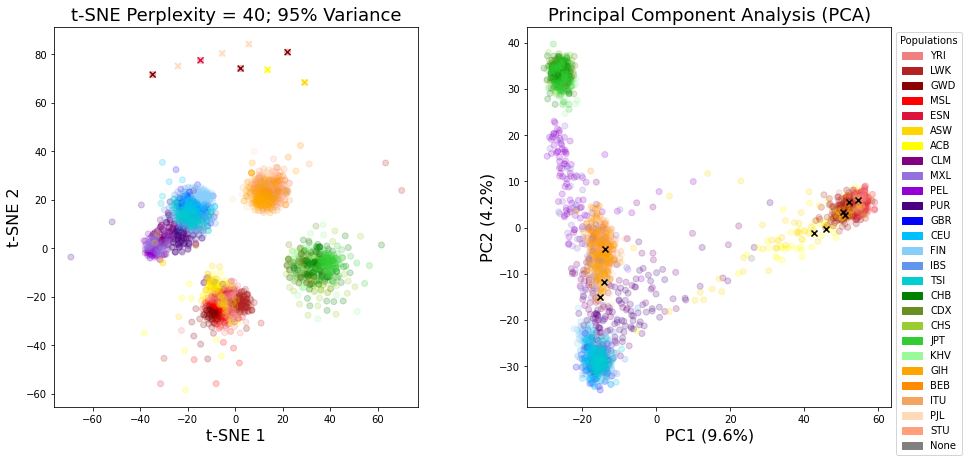

In [15]:
tsne_samples['colors2'] = colors2
pca_res['colors2'] = colors2
outliers = tsne_samples[tsne_samples.iloc[:,1] > 60]
outliers_pca = pca_res[pca_res.index.isin(outliers.index.tolist())]

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplots_adjust(wspace = 0.3)

# t-SNE plot
tsne_file = 'tsne/tsne_' + str(95) + '_' + str(40) + '.tsv'
tsne_samples = pd.read_csv(tsne_file, sep='\t', index_col=0)

ax[0].scatter(tsne_samples.iloc[:,0], tsne_samples.iloc[:,1], c=colors2, alpha=0.2)
ax[0].scatter(outliers.iloc[:,0], outliers.iloc[:,1], c=outliers.iloc[:,2], marker='x')

ax[0].set_xlabel('t-SNE 1', fontsize = 16)
ax[0].set_title('t-SNE Perplexity = 40; 95% Variance', fontsize = 18)
ax[0].set_ylabel('t-SNE 2', fontsize = 16)

# PCA Plot
ax[1].set_xlabel('PC1 (%.1f%%)'%(expvar[0]*100), fontsize = 16)
ax[1].set_ylabel('PC2 (%.1f%%)'%(expvar[1]*100), fontsize = 16)
ax[1].set_title('Principal Component Analysis (PCA)', fontsize = 18)
ax[1].scatter(pca_res.iloc[:,0], pca_res.iloc[:,1], c=colors2, alpha=0.2)
ax[1].scatter(outliers_pca.iloc[:,0], outliers_pca.iloc[:,1], c='black', marker='x')

ax[1].legend(handles=[lightcoral_patch, firebrick_brick_patch, darkred_patch, red_patch, crimson_patch, gold_patch,
                    yellow_patch, purple_patch, mediumpurple_patch, darkviolet_patch, indigo_patch, blue_patch,
                    deepskyblue_patch, lightskyblue_patch, cornflowerblue_patch, darkturquoise_patch, green_patch,
                    olivedrab_patch, yellowgreen_patch, limegreen_patch, palegreen_patch, orange_patch, darkorange_patch,
                    sandybrown_patch, peachpuff_patch, lightsalmon_patch, gray_patch],
                    title='Populations', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()